**Bank Marketing Subscription Prediction**

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Load the Dataset

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Basic Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

Define numerical and categorical columns

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

We have 10 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


# Target variable:
'deposit' → whether the customer subscribed to a term deposit (yes/no)

# Top Features Influencing Subscription
- duration
- poutcome
- previous
- campaign
- age
- job
- balance 
- month

- The dataset usually has no true NaN values
- Identify “unknown” as Missing

In [10]:
(df == 'unknown').sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Replace "unknown" with NaN

In [11]:
import numpy as np

df.replace('unknown', np.nan, inplace=True)

In [12]:
# Now recheck:
df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Mode imputation

In [13]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

Median imputation

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

Final Verification

In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Identify Categorical Columns

In [16]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

One Hot Encoding

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Target Variable : deposit

Separate Features and Target

In [18]:
X = df.drop('deposit', axis=1)
y = df['deposit']

Encode Target Variable

In [19]:
# Check target values:
y = y.map({'yes': 1, 'no': 0})
y.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [20]:
categorical_cols = X.select_dtypes(include='object').columns

X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

Label Encoding using Pandas

In [21]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['default', 'housing', 'loan']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

Final Matrix Check

In [22]:
X_encoded.head()
X_encoded.shape

(11162, 38)

Split Dataset into Train–Test Sets

In [23]:
# Import the Function
from sklearn.model_selection import train_test_split
# Perform the Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,          # features
    y,                  # target (deposit)
    test_size=0.3,      # 30% test data
    random_state=42,    # fixed seed
    stratify=y          # maintains class distribution
)

In [24]:
# Verify the Split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7813, 38)
Testing set shape: (3349, 38)


In [25]:
# Optional class balance check:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

deposit
0    0.526174
1    0.473826
Name: proportion, dtype: float64
deposit
0    0.526127
1    0.473873
Name: proportion, dtype: float64


Train Decision Tree Classifier

In [26]:
# Try Different max_depth Values
for depth in range(2, 8):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    print(f"Depth {depth} | Train: {model.score(X_train, y_train):.3f} | Test: {model.score(X_test, y_test):.3f}")

Depth 2 | Train: 0.729 | Test: 0.726
Depth 3 | Train: 0.772 | Test: 0.773
Depth 4 | Train: 0.792 | Test: 0.794
Depth 5 | Train: 0.803 | Test: 0.798
Depth 6 | Train: 0.818 | Test: 0.802
Depth 7 | Train: 0.831 | Test: 0.809


# .
Best Practical Choice: max_depth = 4 or 5, Why?

- High test accuracy (~79–80%)
- Simpler tree
- Better interpretability
- Lower risk of future overfitting
I selected max_depth 4 or 5 as it provides the best balance between accuracy and interpretability.

Why Not Choose Depth 7?

- Only ~1% gain over depth 5
- Tree becomes harder to interpret
- Slightly higher risk of overfitting on new data

In [27]:
# Train Decision Tree with Limited Depth
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,        # limit depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [28]:
# Train the Model
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
# Check Training Accuracy
train_accuracy = dt_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7918853193395623


Visualize the Decision Tree using plot_tree()

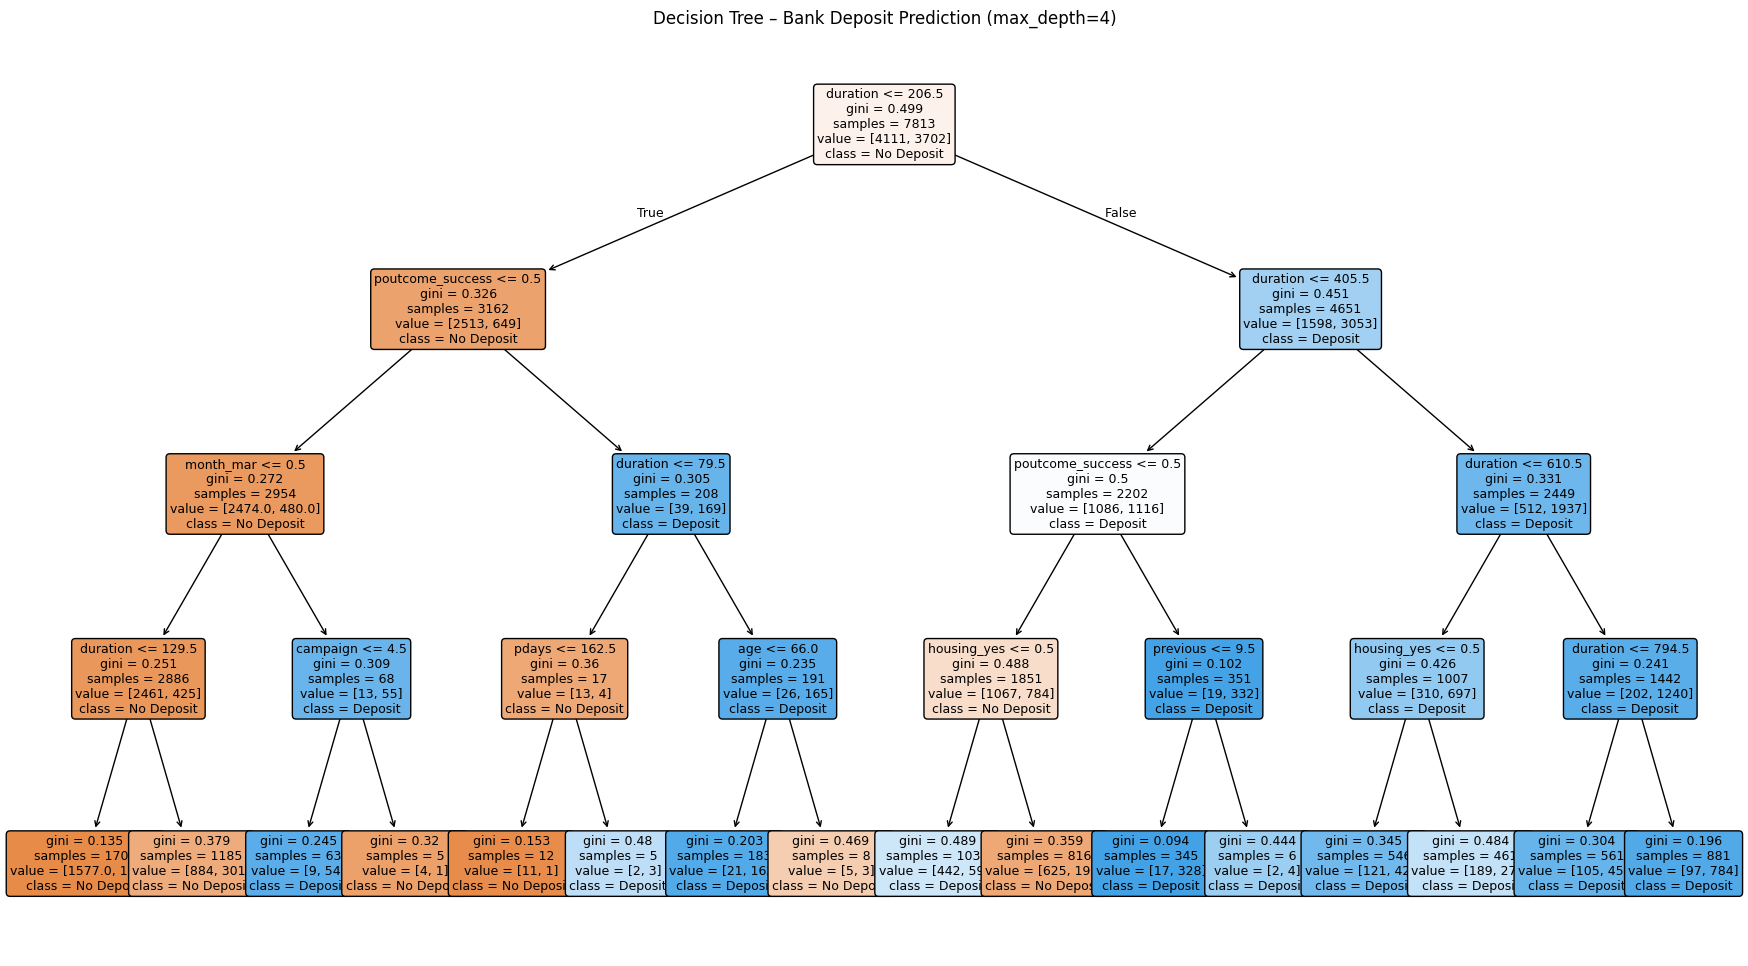

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the Decision Tree
plt.figure(figsize=(22, 12))

plot_tree(
    dt_model,
    feature_names=X_encoded.columns,
    class_names=['No Deposit', 'Deposit'],
    filled=True,
    rounded=True,
    fontsize=9
)

plt.title("Decision Tree – Bank Deposit Prediction (max_depth=4)")
plt.show()

Make Predictions on Test Set

In [31]:
# Make Predictions on Test Set
y_pred = dt_model.predict(X_test)

Generate Classification Report

In [32]:
# Import Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Generate Classification Report
print(classification_report(
    y_test,
    y_pred,
    target_names=['No Deposit', 'Deposit']
))

              precision    recall  f1-score   support

  No Deposit       0.83      0.76      0.80      1762
     Deposit       0.76      0.83      0.79      1587

    accuracy                           0.79      3349
   macro avg       0.80      0.80      0.79      3349
weighted avg       0.80      0.79      0.79      3349



Compare Train vs Test Accuracy

How to Interpret

- Train ≈ Test → good fit
- Train ≫ Test → overfitting
- Both low → underfitting

In [33]:
train_acc = dt_model.score(X_train, y_train)
test_acc = dt_model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7918853193395623
Test Accuracy: 0.7939683487608241


# Key Decision Rules Explaining Subscription Behavior
> Rule 1: Call Duration (Primary Factor)
- IF the call duration is short (≤ ~200 seconds) THEN the customer is unlikely to subscribe to the deposit.
- Short conversations indicate low interest or early call termination.

> Rule 2: Previous Campaign Outcome
- IF the call duration is long AND the previous campaign outcome was successful THEN the customer is very likely to subscribe.
- Past positive response + current engagement strongly predicts subscription.

> Rule 3: Campaign Contact Frequency
- IF the customer is contacted many times in the current campaign AND call duration is low THEN the customer is unlikely to subscribe.
- Repeated calls without engagement reduce customer interest.